In [1]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen, Request
from termcolor import colored
import time
import requests
import re
from glove import Corpus, Glove
from konlpy.tag import Okt
from gensim import models

C:\Users\soymi\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
#get loan data from api 

author = []
vol = []
isbn = []
bookname = []
libcode = []
class_no = []
class_nm = []

for idx,c in enumerate(code):
    url = f'http://data4library.kr/api/itemSrch?&libCode={c}&authKey={key}&pageNo=1&pageSize=10&format=json&startDt=2021-01-01&endDt=2021-06-30'
    res = urlopen(url)
    res_m = res.read().decode('utf-8')
    res_json = json.loads(res_m)
    pc = res_json['response']['numFound'] // 10
    re = res_json['response']['numFound'] % 10
    if pc == 1:
        try:
            url = f'http://data4library.kr/api/itemSrch?libCode={c}&authKey={key}&pageNo=1&pageSize=10&format=json&startDt=2021-01-01&endDt=2021-06-30'
            res = urlopen(url)
            res_m = res.read().decode('utf-8')
            res_json = json.loads(res_m)
            for j in res_json['response']['docs']:
                libcode.append(c)
                author.append(j['doc']['authors'])
                vol.append(j['doc']['vol'])
                isbn.append(j['doc']['isbn13'])
                bookname.append(j['doc']['bookname'])
                class_no.append(j['doc']['class_no'])
        except:
            print(c,pgn)
    elif re == 0:
        for pgn in range(1,pc+1):
            try:
                url = f'http://data4library.kr/api/itemSrch?libCode={c}&authKey={key}&pageNo={pgn}&pageSize=10&format=json&startDt=2021-01-01&endDt=2021-06-30'
                res = urlopen(url)
                res_m = res.read().decode('utf-8')
                res_json = json.loads(res_m)
                for j in res_json['response']['docs']:
                    libcode.append(c)
                    author.append(j['doc']['authors'])
                    vol.append(j['doc']['vol'])
                    isbn.append(j['doc']['isbn13'])
                    bookname.append(j['doc']['bookname'])
                    class_no.append(j['doc']['class_no'])
            except:
                print(c,pgn)

    else:
        for pgn in range(1,pc+2):
            try:
                url = f'http://data4library.kr/api/itemSrch?libCode={c}&authKey={key}&pageNo={pgn}&pageSize=10&format=json&startDt=2021-01-01&endDt=2021-06-30'
                res = urlopen(url)
                res_m = res.read().decode('utf-8')
                res_json = json.loads(res_m)
                for j in res_json['response']['docs']:
                    libcode.append(c)
                    author.append(j['doc']['authors'])
                    vol.append(j['doc']['vol'])
                    isbn.append(j['doc']['isbn13'])
                    bookname.append(j['doc']['bookname'])
                    class_no.append(j['doc']['class_no'])
            except:
                print(c,pgn)

    print(idx/len(code))

0.0
0.0008460236886632825
0.001692047377326565
0.0025380710659898475
0.00338409475465313
125012 124
125012 125
125012 126
125012 127
125012 128
125012 129
125012 130
0.004230118443316413
0.005076142131979695
0.005922165820642978
0.00676818950930626
0.007614213197969543
0.008460236886632826
0.009306260575296108
0.01015228426395939
0.010998307952622674
0.011844331641285956
0.012690355329949238
0.01353637901861252
0.014382402707275803
0.015228426395939087
0.016074450084602367
0.01692047377326565
0.017766497461928935
0.018612521150592216
0.0194585448392555
0.02030456852791878
0.021150592216582064
0.021996615905245348
0.02284263959390863
0.023688663282571912
0.024534686971235193
0.025380710659898477
0.02622673434856176
0.02707275803722504
0.027918781725888325
0.028764805414551606
0.02961082910321489
0.030456852791878174
0.031302876480541454
0.032148900169204735
0.03299492385786802
0.0338409475465313
0.03468697123519458
0.03553299492385787
0.03637901861252115
0.03722504230118443
0.0380710659

ValueError: arrays must all be same length

In [16]:
result = pd.DataFrame({'code' : libcode, 'isbn' : isbn, 'name' : bookname, 'class_no' : class_no,  'author' : author})

In [17]:
result.to_csv('loan.csv', index = False)

In [20]:
len(result)

2873789

In [ ]:
res.read()

In [25]:
loan = pd.read_csv('loan.csv', low_memory=False)

In [26]:
loan

code           isbn                                           name  \
0        127058  9791189169541                                        비양도 연가Ⅱ   
1        127058  9791170262251  지금 잘 자고 있습니까?:SBS 의학전문기자가 알려주는 잠에 관한 흥미로운 이야기   
2        127058  9788991995383                                (그림으로 읽는)生生 심리학   
3        127058  9788974839796                                       대한 독립 만세   
4        127058  9788965136187                           인권과 민주주의 뭔데 이렇게 중요해?   
...         ...            ...                                            ...   
2873784  747005  9788930232715                                  Why? 초등역사학습만화   
2873785  747005  9788930232586                                   Why? 스승과 제자    
2873786  747005  9788997366972                                   수니타의 분홍 자전거    
2873787  747005  9788994198170                                    목 짧은 기린 지피    
2873788  747005  9788936472672               (소아정신과 의사 서천석의) 그림책으로 읽는 아이들 마음    

        class_no                            author  
0          811.7                          지은이: 진한종  
1         517.31                            조동찬 지음  
2            180                          이소라 글.그림  
3          813.7                          정명섭 외 지음  
4         340.22  크리스티네 슐츠-라이스 글;베레나 발하우스 그림손희주 옮김  
...          ...                               ...  
2873784      911                     우덕환 지음;문성기 지음  
2873785      911               이근:지음 ;;그림: 극동만화연구소  
2873786      843     질 로벨:글 ;그림: 리처드 왓슨 ;옮긴이: 아이생각  
2873787    813.7                     고정욱 글 ;박재현 그림  
2873788   598.48                            서천석 지음  

[2873789 rows x 5 columns]

In [27]:
loan.isbn.value_counts()

9788954677158    1367
9791160023176    1239
9788933871553    1233
9791164063581    1145
9791164062898    1136
                 ... 
9781782359753       1
9791186060964       1
9788992036719       1
9791164745548       1
9788966592524       1
Name: isbn, Length: 277358, dtype: int64

In [6]:
loan = pd.read_csv('loan.csv', dtype = {'code' : 'int64', 'isbn' : 'object', 'name' : 'object', 'author' : 'object'})

In [76]:
loan_onlypub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758232 entries, 0 to 2873246
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   code      object
 1   isbn      int64 
 2   name      object
 3   class_no  object
 4   author    object
dtypes: int64(1), object(4)
memory usage: 126.3+ MB


In [3]:
loan_onlypub_bc = pd.read_csv('loan_onlypub_bc.csv')

C:\Users\soymi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
loan_onlypub_bc.groupby('code').size().sort_values(ascending=False)

code
141598    24991
126157    24368
123001    23584
141593    21246
121008    15580
          ...  
145018      177
124012      147
145030       81
143017       64
111208       61
Length: 784, dtype: int64

<AxesSubplot:>

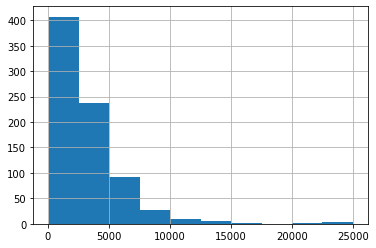

In [7]:
loan_onlypub_bc.groupby('code').size().hist()

In [8]:
libinfo = pd.read_csv('library_info_onlypub.csv')

In [17]:
libinfo.loc[libinfo['bookcount'] == '-',:]

code          name bookcount  loan_6m_count
4    131080         울산도서관         -          17029
17   141139     고양시립대화도서관         -          11515
20   141079         수지도서관         -          10478
31   141055     고양시립마두도서관         -           8887
32   141038       용인중앙도서관         -           8883
36   141239         기흥도서관         -           8524
49   141541         흥덕도서관         -           7659
55   141556         상현도서관         -           7547
66   141160         동백도서관         -           7242
67   141599         남사도서관         -           7213
71   141072     고양시립화정도서관         -           7017
77   141149         죽전도서관         -           6807
81   141118         구성도서관         -           6707
99   141390         보라도서관         -           6241
116  141110         포곡도서관         -           5763
128  141555     고양시립삼송도서관         -           5536
144  141123   고양시립아람누리도서관         -           5244
159  141018     고양시립행신도서관         -           5014
166  141140     고양시립한뫼도서관         -           4862
183  141398     고양시립덕이도서관         -           4562
188  141389         모현도서관         -           4506
194  141546     고양시립신원도서관         -           4445
206  141388     고양시립식사도서관         -           4314
227  141126  고양시립행신어린이도서관         -           4053
228  141073     고양시립백석도서관         -           4032
250  141564         청덕도서관         -           3801
251  141150     고양시립풍동도서관         -           3800
276  141125  고양시립화정어린이도서관         -           3451
427  141124  고양시립주엽어린이도서관         -           2441
502  141059     고양시립원당도서관         -           2023
567  141217       양지해밀도서관         -           1711
625  141129     구갈희망누리도서관         -           1438
734  141582       이동꿈틀도서관         -            866
782  143010       미원교육도서관         -            486

In [16]:
libinfo['bookcount'] == '-'

0      False
1      False
2      False
3      False
4       True
       ...  
813    False
814    False
815    False
816    False
817    False
Name: bookcount, Length: 818, dtype: bool

In [77]:
### 여기부터 reboot함.

In [79]:
with open('공공도서관코드.txt') as f:
    content = f.readlines()
    
publibcode = [x.replace('\n','') for x in content]
publibcode

['127058',
 '111456',
 '125010',
 '125012',
 '125008',
 '111108',
 '141143',
 '141105',
 '141286',
 '141001',
 '125004',
 '111070',
 '111039',
 '111347',
 '111479',
 '111474',
 '111103',
 '111127',
 '711265',
 '111073',
 '111056',
 '111069',
 '111075',
 '111003',
 '111125',
 '111078',
 '111176',
 '111470',
 '111101',
 '111004',
 '142001',
 '111037',
 '111038',
 '111453',
 '111378',
 '111067',
 '111098',
 '111309',
 '111118',
 '111097',
 '111005',
 '111373',
 '146001',
 '111216',
 '111214',
 '111006',
 '111049',
 '148302',
 '148089',
 '148033',
 '148184',
 '148307',
 '148046',
 '141004',
 '141005',
 '141006',
 '141008',
 '141012',
 '141106',
 '141010',
 '141141',
 '141009',
 '141017',
 '141130',
 '148308',
 '147168',
 '147001',
 '147165',
 '147042',
 '147044',
 '147025',
 '147120',
 '147026',
 '147052',
 '111007',
 '142003',
 '141574',
 '141139',
 '141398',
 '141055',
 '141073',
 '141635',
 '141555',
 '141388',
 '141546',
 '141123',
 '141059',
 '141631',
 '141124',
 '141150',
 '141140',

In [95]:
#library information api
jn_key = ''

code_loop = []
name = []
loan_count_6m = []
bookcount = []

for idx,p in enumerate(publibcode):
    url = f'http://data4library.kr/api/libSrch?authKey={jn_key}&pageNo=1&pageSize=10&format=json&libCode={p}'
    res = requests.get(url)
    info = res.json()['response']['libs'][0]['lib']
    code_loop.append(p)
    name.append(info['libName'])
    bookcount.append(info['BookCount'])
    
    url = f'http://data4library.kr/api/itemSrch?libCode={p}&authKey={jn_key}&startDt=2021-01-01&endDt=2021-06-30&pageNo=1&pageSize=1&format=json'
    res = requests.get(url)
    loan_count_6m.append(res.json()['response']['numFound'])
    
    print(idx/len(publibcode))

0.0
0.0011806375442739079
0.0023612750885478157
0.0035419126328217238
0.004722550177095631
0.0059031877213695395
0.0070838252656434475
0.008264462809917356
0.009445100354191263
0.010625737898465172
0.011806375442739079
0.012987012987012988
0.014167650531286895
0.015348288075560802
0.01652892561983471
0.01770956316410862
0.018890200708382526
0.020070838252656435
0.021251475796930343
0.02243211334120425
0.023612750885478158
0.024793388429752067
0.025974025974025976
0.02715466351829988
0.02833530106257379
0.0295159386068477
0.030696576151121605
0.031877213695395513
0.03305785123966942
0.03423848878394333
0.03541912632821724
0.03659976387249114
0.03778040141676505
0.03896103896103896
0.04014167650531287
0.04132231404958678
0.04250295159386069
0.043683589138134596
0.0448642266824085
0.04604486422668241
0.047225501770956316
0.048406139315230225
0.049586776859504134
0.05076741440377804
0.05194805194805195
0.053128689492325853
0.05430932703659976
0.05548996458087367
0.05667060212514758
0.05785

In [96]:
lib_info = pd.DataFrame({'code' : code_loop, 'name' : name, 'bookcount' : bookcount, 'loan_count_6m' : loan_count_6m})
lib_info

code      name bookcount  loan_count_6m
0    127058   2.28도서관     51186            342
1    111456    가락몰도서관     32409           1742
2    125010    가수원도서관    156677           5828
3    125012     가양도서관    142068           2792
4    125008     가오도서관    132671           3331
..      ...       ...       ...            ...
842  148054   화정글샘도서관    164182           4646
843  142026   화천교육도서관     71548           2560
844  142027   횡성교육도서관    138743           2466
845  111446  휘경어린이도서관     36840            689
846  141541     흥덕도서관         -           7659

[847 rows x 4 columns]

In [ ]:
lib_info = pd.read_csv('lib_info.csv')

In [103]:
lib_info.loan_count_6m.sort_values(ascending=False).mean()

3271.216056670602

In [112]:
lib_user

코드값    광역시도명 세부지역명      전체  영유아(0~5세)  유아(6~7세)  초등(8~13세)  \
0    11010    서울특별시   종로구  107779       3840      3070       8522   
1    11020    서울특별시    중구   68290       2279      1545       3386   
2    11030    서울특별시   용산구  111150       3346      3388       7844   
3    11040    서울특별시   성동구  155085       6752      7260      10854   
4    11050    서울특별시   광진구  136148       4285      3853       8631   
..     ...      ...   ...     ...        ...       ...        ...   
245  38380     경상남도   함양군     635          1         5         50   
246  38390     경상남도   거창군   20590         48      1948       4708   
247  38400     경상남도   합천군     684          3         2         45   
248  39010  제주특별자치도   제주시  172937      12155     10017      22879   
249  39020  제주특별자치도  서귀포시   52379       1895      2852       7405   

     청소년(14~19세)    20대    30대    40대   50대  60대 이상    미상  
0          14589  28200  23370  16386  6063    3125   614  
1           6778  17000  16696  11096  4847    2286  2377  
2          11352  28310  27493  19087  6658    3155   517  
3          15266  36871  40651  22356  9047    5070   958  
4          12674  36131  34921  22704  7762    3911  1276  
..           ...    ...    ...    ...   ...     ...   ...  
245          166    156     92     89    47      26     3  
246         3031   2893   4130   2168   971     651    42  
247          164    145     85     94    79      62     5  
248        20871  25334  41296  25480  7395    3519  3991  
249         5244   9109  11791   7544  2597    1596  2346  

[250 rows x 14 columns]

In [6]:
#get libcode by there region 
jn_key = ''
lib_user = pd.read_excel('lib_user.xlsx', dtype={'코드값' : 'object'})
dtl_region = lib_user.코드값

libcode_loop = []
dtl_region_loop = []

for idx,d in enumerate(dtl_region):
    url = f'http://data4library.kr/api/libSrch?authKey={jn_key}&pageNo=1&pageSize=10&format=json&dtl_region={d}'
    res = requests.get(url)
    info = res.json()['response']['libs']
    for i in info:
        dtl_region_loop.append(d)
        try:
            libcode_loop.append(i['lib']['libCode'])
        except:
            libcode_loop.append(np.NaN)
    print(idx/len(dtl_region))

lib_region = pd.DataFrame({'code' : libcode_loop, 'dtl_region' : dtl_region_loop})

0.0
0.004
0.008
0.012
0.016
0.02
0.024
0.028
0.032
0.036
0.04
0.044
0.048
0.052
0.056
0.06
0.064
0.068
0.072
0.076
0.08
0.084
0.088
0.092
0.096
0.1
0.104
0.108
0.112
0.116
0.12
0.124
0.128
0.132
0.136
0.14
0.144
0.148
0.152
0.156
0.16
0.164
0.168
0.172
0.176
0.18
0.184
0.188
0.192
0.196
0.2
0.204
0.208
0.212
0.216
0.22
0.224
0.228
0.232
0.236
0.24
0.244
0.248
0.252
0.256
0.26
0.264
0.268
0.272
0.276
0.28
0.284
0.288
0.292
0.296
0.3
0.304
0.308
0.312
0.316
0.32
0.324
0.328
0.332
0.336
0.34
0.344
0.348
0.352
0.356
0.36
0.364
0.368
0.372
0.376
0.38
0.384
0.388
0.392
0.396
0.4
0.404
0.408
0.412
0.416
0.42
0.424
0.428
0.432
0.436
0.44
0.444
0.448
0.452
0.456
0.46
0.464
0.468
0.472
0.476
0.48
0.484
0.488
0.492
0.496
0.5
0.504
0.508
0.512
0.516
0.52
0.524
0.528
0.532
0.536
0.54
0.544
0.548
0.552
0.556
0.56
0.564
0.568
0.572
0.576
0.58
0.584
0.588
0.592
0.596
0.6
0.604
0.608
0.612
0.616
0.62
0.624
0.628
0.632
0.636
0.64
0.644
0.648
0.652
0.656
0.66
0.664
0.668
0.672
0.676
0.68
0.684
0.688
0.69

In [9]:
lib_region.groupby('dtl_region').size().reset_index()

dtl_region   0
0         11010   3
1         11020   5
2         11030  10
3         11040   7
4         11050   5
..          ...  ..
205       38111   1
206       38350   1
207       38390   1
208       39010   7
209       39020   8

[210 rows x 2 columns]

In [123]:
lib_info = lib_info.merge(lib_region, on='code')

In [133]:
lib_info.loan_count_6m.sort_values(ascending=False)[:70]

159    41512
737    24991
332    24368
282    23584
605    21246
       ...  
308     7177
355     7080
66      7077
89      7017
426     6983
Name: loan_count_6m, Length: 70, dtype: int64

In [127]:
lib_user.columns

Index(['코드값', '광역시도명', '세부지역명', '전체', '영유아(0~5세)', '유아(6~7세)', '초등(8~13세)',
       '청소년(14~19세)', '20대', '30대', '40대', '50대', '60대 이상', '미상'],
      dtype='object')

In [146]:
#convert users to percentage
lib_user = pd.read_excel('lib_user.xlsx', dtype={'코드값' : 'object'})
lib_user = lib_user.drop(columns=['광역시도명','세부지역명'])
lib_user = lib_user.set_index('코드값')
for i in range(0,len(lib_user)):
    u = lib_user.iloc[i,0]
    for n in range(1,11):
        lib_user.iloc[i,n] = lib_user.iloc[i,n]/u
lib_user = lib_user.reset_index()
lib_user = lib_user.rename(columns = {'코드값' : 'dtl_region'})
lib_user

dtl_region      전체  영유아(0~5세)  유아(6~7세)  초등(8~13세)  청소년(14~19세)  \
0         11010  107779   0.035628  0.028484   0.079069     0.135360   
1         11020   68290   0.033372  0.022624   0.049583     0.099253   
2         11030  111150   0.030103  0.030481   0.070571     0.102132   
3         11040  155085   0.043537  0.046813   0.069987     0.098436   
4         11050  136148   0.031473  0.028300   0.063394     0.093090   
..          ...     ...        ...       ...        ...          ...   
245       38380     635   0.001575  0.007874   0.078740     0.261417   
246       38390   20590   0.002331  0.094609   0.228655     0.147207   
247       38400     684   0.004386  0.002924   0.065789     0.239766   
248       39010  172937   0.070286  0.057923   0.132297     0.120686   
249       39020   52379   0.036179  0.054449   0.141373     0.100116   

          20대       30대       40대       50대    60대 이상        미상  
0    0.261647  0.216833  0.152033  0.056254  0.028995  0.005697  
1    0.248938  0.244487  0.162484  0.070977  0.033475  0.034807  
2    0.254701  0.247350  0.171723  0.059901  0.028385  0.004651  
3    0.237747  0.262121  0.144153  0.058336  0.032692  0.006177  
4    0.265380  0.256493  0.166760  0.057011  0.028726  0.009372  
..        ...       ...       ...       ...       ...       ...  
245  0.245669  0.144882  0.140157  0.074016  0.040945  0.004724  
246  0.140505  0.200583  0.105294  0.047159  0.031617  0.002040  
247  0.211988  0.124269  0.137427  0.115497  0.090643  0.007310  
248  0.146493  0.238792  0.147337  0.042761  0.020348  0.023078  
249  0.173906  0.225109  0.144027  0.049581  0.030470  0.044789  

[250 rows x 12 columns]

In [223]:
#merge region data and lib data

lib_final = lib_info.merge(lib_user, on = 'dtl_region')

In [10]:
lib_final = lib_final.merge(lib_region.groupby('dtl_region').size().reset_index(), on = 'dtl_region')

In [21]:
#api에서 장서수 등록이 안되있던 도서관들
#직접전화해서받음
lib_final.iloc[5,2] = 306428
lib_final.iloc[32,2] = 313808
lib_final.iloc[48,2] = 126879
lib_final.iloc[17,2] = 147768
lib_final.iloc[20,2] = 264513
lib_final.iloc[31,2] = 157503
lib_final.iloc[36,2] = 195382

In [31]:
lib_final = lib_final.rename(columns={'0':'libn_region'})

In [32]:
lib_final = lib_final.sort_values('loan_count_6m', ascending=False).iloc[:50,:]
lib_final.to_csv('lib_final.csv', index = False)

In [296]:
lib_final = pd.read_csv('lib_final.csv')

In [297]:
lib_final

code           name  bookcount  loan_count_6m  dtl_region      전체  \
0    50001        국립세종도서관     697845          41512       29010   87912   
1   141598     평택시립배다리도서관     207584          24991       31070  285092   
2   126157          부산도서관     354657          24368       21150   68080   
3   123001         미추홀도서관     474251          23584       23050  213707   
4   141593          장기도서관     134647          21246       31230  168182   
5   131080          울산도서관     306428          17029       26020  175079   
6   121008    부산광역시립시민도서관     927806          15582       21050  104467   
7   149023          한라도서관     381762          14322       39010  172937   
8   124003    광주광역시립무등도서관     375936          12731       24040  190998   
9   146126       전라남도립도서관     304045          12726       36420   24307   
10  141141      경기평생교육학습관     724964          12710       31012  234881   
11  141114      광주시립중앙도서관     419625          12371       31250  163261   
12  141135       군포시중앙도서관     382660          12199       31160  235327   
13  147168          경북도서관      92552          11826       37400    8908   
14  141077      안양시립석수도서관     484332          11825       31041  139471   
15  126024   부산광역시립해운대도서관     320583          11802       21090  166786   
16  111037      강북문화정보도서관     281463          11734       11090  196392   
17  141139      고양시립대화도서관     147768          11515       31104  214802   
18  141057          중봉도서관     368065          11466       31230  168182   
19  143015        제천시립도서관     541404          11179       33030   68011   
20  141079          수지도서관     264513          10478       31193  334831   
21  126143    부산광역시 연제도서관     133183          10347       21130   71018   
22  127072      수성구립범어도서관     226716          10089       22060  137482   
23  141069      성남시 중앙도서관     393864          10019       31023  469363   
24  121012    부산광역시립중앙도서관     431091           9971       21010    7951   
25  142021        춘천교육문화관     358950           9847       32010  130098   
26  141010      경기중앙교육도서관     773070           9488       31011  221470   
27  142020        춘천시립도서관     201542           9080       32010  130098   
28  123006  인천광역시교육청중앙도서관     471393           8961       23050  213707   
29  141158      오산시 중앙도서관     335571           8898       31140  127229   
30  121018    부산광역시 금정도서관     279567           8890       21110   63709   
31  141055      고양시립마두도서관     157503           8887       31103  173655   
32  141038        용인중앙도서관     313808           8883       31191  140701   
33  141591          고촌도서관      87451           8796       31230  168182   
34  125003          한밭도서관     613349           8635       25020   71861   
35  121005    부산광역시립부전도서관     426123           8525       21050  104467   
36  141239          기흥도서관     195382           8524       31192  332919   
37  141052      성남시 분당도서관     381074           8492       31023  469363   
38  122001  대구2.28기념학생도서관     347061           8440       22020   62798   
39  122007    대구광역시립수성도서관     282350           8431       22060  137482   
40  142015      원주시립중앙도서관     363010           8308       32020  212309   
41  127085      수성구립고산도서관     135102           8293       22060  137482   
42  121003    부산광역시립구포도서관     469021           8112       21080  144802   
43  144174      아산시 중앙도서관     263376           7929       34040   89113   
44  111034      중랑구립정보도서관     263538           7892       11070  198379   
45  144011      세종평생교육학습관     175066           7809       29010   87912   
46  130028          월평도서관      61639           7771       25030  152397   
47  141036      안양시립평촌도서관     465595           7726       31042  266577   
48  141541          흥덕도서관     126879           7659       31192  332919   
49  142014        원주교육문화관     316241           7652       32020  212309   

    영유아(0~5세)  유아(6~7세)  초등(8~13세)  청소년(14~19세)       20대       30대       40대  \
0    0.043532  0.046774   0.118346     0.076952  0.126502  0.278790  0.216387   
1    0.070711  0.0

도서관 선정 기준

1.도서관정보나루 api 기준 region code가 부여되어있어야함.  

2.도서관정보나루 api 기준 도서관 code가 부여되어있어야함.  

3.도서관정보나루 api 기준 6개월(2021-01-01 ~ 2021-06-30) 대출 순위 상위 50개 도서관 why ? 작은도서관들은 빌려지냐 안빌려지냐(대부분이 대출수가 1임)가 중요하지 몇권빌려지냐는 중요하지않음. 이렇게짤라도 중위값은 1

In [48]:
loan = pd.read_csv('loan.csv')
loan_final = loan.loc[loan.code.isin(lib_final.code),:]

C:\Users\soymi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
loan_final = loan_final.reset_index(drop = True).drop(columns=['name','class_no','author'])

In [50]:
loan_final

code           isbn
0       111037  9781481458696
1       111037  9781338263718
2       111037  9780794444242
3       111037  9781338214499
4       111037  9788971904343
...        ...            ...
589505  141541  9791197251511
589506  141541  9791186259948
589507  141541  9791157769568
589508  141541  9791166032738
589509  141541  9791189816094

[589510 rows x 2 columns]

In [51]:
loan_final.to_csv('loan_final.csv', index = False)

In [294]:
loan_final = pd.read_csv('loan_final.csv')

In [3]:
loan_final.isbn.value_counts()

9791160023176    179
9788933871553    157
9791165341909    156
9788954677158    153
9788965964230    149
                ... 
9788993196436      1
9788971395691      1
9788961886796      1
9791135738371      1
9791188704156      1
Name: isbn, Length: 130763, dtype: int64

책 선정의 기준 : openAPI 기준으로 추출된 column에 na값이 없는것들.

In [4]:
#get book data from openAPI
oa_key = ''
isbn = loan_final.isbn.value_counts().index


title = [] 
publish_date = []
price = []
subject_1 = []
subject_2 = []
reader = []
pub_type = []
pages = []
author = []
isbn_loop = []
blank_isbn = []

for idx, i in enumerate(isbn):
    url = f'http://seoji.nl.go.kr/landingPage/SearchApi.do?cert_key={oa_key}&isbn={i}&result_style=json&page_size=1&page_no=1'
    res = requests.get(url)
    try:
        info = res.json()['docs'][0]
    except:
        blank_isbn.append(i)
        print(i)
        continue
    title.append(info['TITLE'])
    if info['REAL_PUBLISH_DATE'] == '':
        publish_date.append(info['PUBLISH_PREDATE'])
    else:
        publish_date.append(info['REAL_PUBLISH_DATE'])
    if info['REAL_PRICE'] == '':
        price.append(info['PRE_PRICE'])
    else:
        price.append(info['REAL_PRICE'])
    try:
        ea_code = info['EA_ADD_CODE']
        subject_1.append(info['EA_ADD_CODE'][2])
        subject_2.append(info['EA_ADD_CODE'][3])
        reader.append(info['EA_ADD_CODE'][0])
        pub_type.append(info['EA_ADD_CODE'][1])
    except:
        subject_1.append(np.NaN)
        subject_2.append(np.NaN)
        reader.append(np.NaN)
        pub_type.append(np.NaN)
    pages.append(info['PAGE'])
    author.append(info['AUTHOR'])
    isbn_loop.append(i)
    print(idx/len(isbn))

0.0
7.647423200752506e-06
1.5294846401505012e-05
2.294226960225752e-05
3.0589692803010024e-05
3.823711600376253e-05
4.588453920451504e-05
9787562152163
6.117938560602005e-05
6.882680880677255e-05
7.647423200752506e-05
8.412165520827757e-05
9.176907840903008e-05
9.941650160978259e-05
0.00010706392481053509
0.0001147113480112876
0.0001223587712120401
0.00013000619441279262
0.0001376536176135451
0.00014530104081429763
0.00015294846401505012
0.00016059588721580265
9788966597505
9791165951146
0.00018353815681806016
0.00019118558001881265
0.00019883300321956517
0.00020648042642031766
0.00021412784962107019
0.00022177527282182268
0.0002294226960225752
0.0002370701192233277
0.0002447175424240802
0.00025236496562483274
0.00026001238882558523
0.0002676598120263377
0.0002753072352270902
0.0002829546584278427
0.00029060208162859526
0.00029824950482934776
0.00030589692803010025
0.00031354435123085274
0.0003211917744316053
0.0003288391976323578
0.0003364866208331103
0.0003441340440338628
0.000351781

In [14]:
book_info = pd.DataFrame({'isbn' : isbn_loop, 'title' : title, 'price' : price, 'subject_1' : subject_1, 'subject_2' : subject_2, 'reader' : reader, 'pub_type' : pub_type, 'pages' : pages, 'author' : author, 'pub_date' : publish_date})

In [15]:
book_info = book_info.dropna(axis = 0, how = 'any')

In [16]:
book_info.to_csv('book_info.csv', index = False)

In [101]:
book_info = pd.read_csv('book_info.csv', dtype = {'pub_date' : 'object','isbn':'object'})

In [102]:
book_info = book_info.dropna(axis = 0, how = 'any')
book_info = book_info.reset_index(drop=True)

In [103]:
book_info.loc[book_info.pub_date == '29200210', 'pub_date'] = '20200210'

In [104]:
days = []
for pub_d in book_info.pub_date:
    days.append((pd.to_datetime('20210630', format = '%Y%m%d') - pd.to_datetime(pub_d, format='%Y%m%d')).days)
book_info.loc[:,'pub_date'] = days

In [105]:
book_info.pub_date = book_info.pub_date.clip(lower=30,upper=365)

<AxesSubplot:>

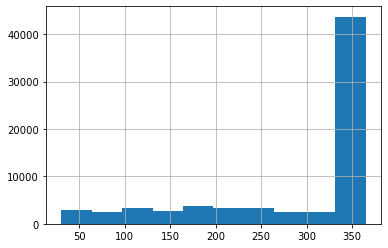

In [106]:
book_info.pub_date.hist()

In [136]:
stopwords = ['지음','지은이','그림','글','저자','집필자','옮긴이','옮김','원작']

def get_names(b):
    a = [x for x in re.findall(u'[\u3131-\uD79D]+', str(b)) if x not in stopwords]
    return a

In [138]:
book_info['author'] = book_info['author'].apply(get_names)

In [139]:
book_info

isbn                      title   price  subject_1  subject_2  \
0      9791160023176  주린이가 가장 알고 싶은 최다질문 top 77   18000          3          2   
1      9788933871553               모래알만 한 진실이라도   16000          8          1   
2      9791165341909                 달러구트 꿈 백화점   13800          8          1   
3      9788954677158                        긴긴밤   11500          8          1   
4      9788965964230             어떤 죽음이 삶에게 말했다   15000          8          1   
...              ...                        ...     ...        ...        ...   
70463  9791170261933     (미래를 위한 따뜻한 실천,) 업사이클링   12000          3          0   
70464  9791188678921                  아내가 그린 이승  15,000          8          1   
70465  9788948058604                    R&D변화관리  비매품/무료          5          2   
70466  9791129014740       4차 산업혁명 대응 현황과 향후 과제   10000          5          0   
70467  9791188704156       (보고 듣고 말하는) 호락호락 한국사   12000          9          0   

       reader  pub_type   pages      author  pub_date  
0           0         3  388 p.       [염승환]       161  
1           0         3  286 p.       [박완서]       205  
2           0         3  298 p.       [이미예]       355  
3           7         3  144 p.        [루리]       147  
4           0         3  261 p.       [김범석]       163  
...       ...       ...     ...         ...       ...  
70463       7         3  137 p.  [박선희, 박선하]       365  
70464       0         3     128       [김인권]       306  
70465       9         3  100 p.       [임홍기]       365  
70466       9         3   77 p.   [국회입법조사처]       365  
70467       7         4  187 p.  [문원림, 김규준]       365  

[70468 rows x 10 columns]

In [147]:
re.findall(r'\d+', book_info.price[70464].replace(',',''))

['15000']

In [148]:
def get_price(x):
    a = re.findall(r'\d+', x.replace(',',''))
    if a == []:
        return int(0)
    else:
        return max(a)

In [152]:
book_info['price'] = book_info['price'].apply(get_price)

In [287]:
book_info

isbn                      title  price  subject_1  subject_2  \
0      9791160023176  주린이가 가장 알고 싶은 최다질문 top 77  18000          3          2   
1      9788933871553               모래알만 한 진실이라도  16000          8          1   
2      9791165341909                 달러구트 꿈 백화점  13800          8          1   
3      9788954677158                        긴긴밤  11500          8          1   
4      9788965964230             어떤 죽음이 삶에게 말했다  15000          8          1   
...              ...                        ...    ...        ...        ...   
70463  9791170261933     (미래를 위한 따뜻한 실천,) 업사이클링  12000          3          0   
70464  9791188678921                  아내가 그린 이승  15000          8          1   
70465  9788948058604                    R&D변화관리      0          5          2   
70466  9791129014740       4차 산업혁명 대응 현황과 향후 과제  10000          5          0   
70467  9791188704156       (보고 듣고 말하는) 호락호락 한국사  12000          9          0   

       reader  pub_type   pages      author  pub_date  
0           0         3  388 p.       [염승환]       161  
1           0         3  286 p.       [박완서]       205  
2           0         3  298 p.       [이미예]       355  
3           7         3  144 p.        [루리]       147  
4           0         3  261 p.       [김범석]       163  
...       ...       ...     ...         ...       ...  
70463       7         3  137 p.  [박선희, 박선하]       365  
70464       0         3     128       [김인권]       306  
70465       9         3  100 p.       [임홍기]       365  
70466       9         3   77 p.   [국회입법조사처]       365  
70467       7         4  187 p.  [문원림, 김규준]       365  

[70468 rows x 10 columns]

In [164]:
# stopwords from https://www.ranks.nl/stopwords/korean
with open('stopwords_title.txt', encoding = 'UTF-8') as f:
    content = f.readlines()
    
stopword_title = [x.replace('\n','') for x in content]
stopword_title

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [221]:
okt = Okt()
tokenized_data = []

for sentence in book_info['title']:
    temp_X = okt.nouns(sentence)
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)

In [222]:
tokenized_data

[['가장', '알', '최', '질문'],
 ['모래알', '진실'],
 ['달러', '구트', '꿈', '백화점'],
 ['밤'],
 ['죽음', '삶', '말'],
 ['수학', '아이', '공부'],
 ['착각'],
 ['마지막', '몰입'],
 ['과자', '가게', '천당'],
 ['돈', '심리학'],
 ['어린이', '세계'],
 ['돈', '시나리오'],
 ['아들', '돈', '공부'],
 ['질서', '너머'],
 ['과자', '가게', '천당'],
 ['푸른', '사자'],
 ['어쩌면', '스무', '번'],
 ['나', '강물', '말'],
 ['정재승', '인간', '탐구', '보고서'],
 ['그녀', '계획'],
 ['슈퍼', '개미', '김정환', '나', '첫', '투자', '수업'],
 ['슈퍼', '개미', '김정환', '나', '첫', '투자', '수업'],
 ['메트로폴리스'],
 ['천문학자', '별', '보지'],
 ['제', '작가', '수상', '작품집'],
 ['휴먼', '카인', '드'],
 ['게이츠', '기후', '재앙', '피하', '법'],
 ['사이보그'],
 ['전국', '축제', '자랑'],
 ['달'],
 ['추리', '천재', '엉덩이', '탐정'],
 ['사람', '사람', '이면'],
 ['페이지', '세상', '가장', '심리', '수업'],
 ['밤', '필통', '안'],
 ['십', '년', '가게', '마법사'],
 ['미드나잇', '선'],
 ['결혼', '생활'],
 ['눈보라'],
 [],
 ['미드나잇', '선'],
 ['바다', '속', '모험'],
 ['유리', '멘탈', '위', '심리', '책'],
 ['타인', '말'],
 ['층', '나무', '집'],
 ['오늘', '법정'],
 ['일인칭', '단수'],
 ['미드나잇', '라이브러리'],
 ['수상한', '기차역'],
 ['좀', '사람'],
 ['디', '앤'],
 ['니', '소년'],
 ['절대', '배

In [223]:
corpus = Corpus()
corpus.fit(tokenized_data, window = 5)

In [224]:
glove = Glove(no_components=128, learning_rate=0.01)
glove.fit(corpus.matrix, epochs = 50, no_threads = 16, verbose = True)
glove.add_dictionary(corpus.dictionary)

Performing 50 training epochs with 16 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


In [208]:
glove

In [225]:
glove.dictionary.keys()

dict_keys(['가장', '알', '최', '질문', '모래알', '진실', '달러', '구트', '꿈', '백화점', '밤', '죽음', '삶', '말', '수학', '아이', '공부', '착각', '마지막', '몰입', '과자', '가게', '천당', '돈', '심리학', '어린이', '세계', '시나리오', '아들', '질서', '너머', '푸른', '사자', '어쩌면', '스무', '번', '나', '강물', '정재승', '인간', '탐구', '보고서', '그녀', '계획', '슈퍼', '개미', '김정환', '첫', '투자', '수업', '메트로폴리스', '천문학자', '별', '보지', '제', '작가', '수상', '작품집', '휴먼', '카인', '드', '게이츠', '기후', '재앙', '피하', '법', '사이보그', '전국', '축제', '자랑', '달', '추리', '천재', '엉덩이', '탐정', '사람', '이면', '페이지', '세상', '심리', '필통', '안', '십', '년', '마법사', '미드나잇', '선', '결혼', '생활', '눈보라', '바다', '속', '모험', '유리', '멘탈', '위', '책', '타인', '층', '나무', '집', '오늘', '법정', '일인칭', '단수', '라이브러리', '수상한', '기차역', '좀', '디', '앤', '니', '소년', '절대', '배신', '기술', '서점', '일기', '유산', '버블', '부의', '전환', '연금술', '엔드', '오브', '타임', '운동', '꼬마', '흡혈귀', '부모', '중', '어른', '메타', '버스', '건', '호랑이', '덫', '설민석', '한국사', '답', '순간', '아버지', '그때', '이야기', '위기', '시대', '미래', '하나요', '유튜브', '직방', '빅데이터', '신', '토시', '앞', '타이밍', '카카오', '프렌즈', '파친코', '초등', '매일', '글쓰기', '힘', '남매

In [226]:
glove.word_vectors

array([[ 1.54858460e-02, -4.16401670e-03, -5.65798147e-02, ...,
        -1.07276748e-02,  2.98302628e-03,  2.34655526e-03],
       [-1.67057599e-03,  2.80545088e-03, -8.81810050e-03, ...,
        -8.85168150e-03,  6.06469791e-03, -2.66237968e-03],
       [ 3.44745593e-04,  2.72797697e-03, -1.90490812e-03, ...,
        -1.86514429e-03, -3.20815485e-04,  1.50098626e-04],
       ...,
       [ 2.85062960e-03, -2.72332432e-03,  2.01523268e-03, ...,
         3.09063377e-03,  1.77634834e-03,  2.25902796e-03],
       [ 1.30285602e-04, -1.10008017e-03,  4.08141559e-03, ...,
         2.32377273e-03,  1.50459541e-03,  3.45755880e-03],
       [ 2.83138311e-03, -2.75989413e-05,  3.21133984e-03, ...,
         6.69860533e-04,  3.25050081e-03, -3.01766821e-03]])

In [242]:
#train이 잘 되지않음.
glove.most_similar('관람차',number=5)

[('장고', 0.3046318759200156),
 ('카르멘', 0.30375703088891554),
 ('관목', 0.3033443039389135),
 ('고잉홈', 0.30323142272335224)]

In [259]:
#https://fasttext.cc/docs/en/crawl-vectors.html
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')

In [275]:
ko_model

In [284]:
avg_ed = []
for t in tokenized_data:
    if len(t) == 0:
        avg_ed.append(np.zeros(300))
    else:
        avg_ed.append(sum([ko_model.wv[x] for x in t])/len(t))

In [290]:
book_info_ed = pd.concat([book_info, pd.DataFrame(avg_ed)],axis = 1)

In [292]:
book_info_ed.to_csv('book_info_ed.csv', index = False)

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras_tuner import BayesianOptimization, HyperModel
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner
from skopt import BayesSearchCV
import xgboost as xgb
import joblib
import pickle

In [3]:
#n개이상으로 하는걸 만듬

def get_pages(x):
    x = re.findall(r'\d+', x)
    if x == []:
        return int(0)
    else:
        return max(x)

def list_to_str(x):
    return str(x).replace('[','').replace(']','').replace("'",'')

def setting_n(q):
    lib_final = pd.read_csv('lib_final.csv')
    book_info_ed = pd.read_csv('book_info_ed.csv')
    loan_final = pd.read_csv('loan_final.csv')
    loan_train = loan_final.groupby(['code','isbn']).size().reset_index().rename(columns = {0 : 'label'})
    book_info_ed['pages'] = book_info_ed['pages'].apply(get_pages)
    book_info_ed['author'] = book_info_ed['author'].apply(list_to_str)

    gt_loan = loan_train.loc[loan_train['label'] > q,'isbn']
    gt_dummies = book_info_ed.loc[book_info_ed.isbn.isin(gt_loan),'author'].str.get_dummies(sep = ', ')
    
    def gt(v):
        return str([x for x in v if x in gt_dummies]).replace('[','').replace(']','').replace("'",'')

    book_info_ed['author'] = book_info_ed['author'].str.split(', ').apply(gt)
    book_info_dummies = book_info_ed['author'].str.get_dummies(sep=', ')

    book_info_train = pd.concat([book_info_ed, book_info_dummies],axis = 1)
    book_info_train = book_info_train.drop(columns = ['title','author'])
    book_info_train.to_csv(f'book_info_train_gt{q}.csv', index = False)

    lib_final = lib_final.drop(columns=['name', 'dtl_region'])

    data_gt = loan_train.merge(book_info_train, on = 'isbn').merge(lib_final, on = 'code').drop(columns=['isbn','code'])
    
    dt_gt = {}
    for c in [x for x in data_gt.columns if len(data_gt[x].value_counts()) < q]:
        dt_gt[c] = 'int8'
    
    import json
    
    json = json.dumps(dt_gt)
    f = open(f'dt_gt{q}.json', 'w')
    f.write(json)
    f.close
    
    data_gt.to_csv(f'data_gt{q}.csv', index = False)
    
    data_gt = pd.read_csv(f'data_gt{q}.csv', dtype=dt_gt)
    data_gt.label = np.log10(data_gt.label)
    
    data_X, data_y = data_gt.loc[:,[x for x in data_gt.columns if x != 'label']], data_gt.label
    scaler = MinMaxScaler()
    scaler.fit(data_X)
    data_X = scaler.transform(data_X)
    
    joblib.dump(scaler, f'scaler_gt{q}.gz')
    
    X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.2, random_state = 42)

    input_s = len(data_gt.columns) - 1
    
    del(data_gt)
    del(data_X)
    del(data_y)
    
    def mlp(hp):
        model = keras.models.Sequential()
        model.add(keras.layers.InputLayer(input_shape = input_s))
        for iterzz in range(hp.Int('num_layers', 1, 10)):
            model.add(keras.layers.Dense(units = hp.Int('units', min_value = 10, max_value = 300, step = 10),
                                        activation = 'selu', kernel_initializer = 'lecun_normal',
                                        use_bias = False))
            model.add(keras.layers.AlphaDropout(rate = hp.Float('dropout_rate', min_value = 0.01, max_value = 0.3, step = 0.01, default = 0.1), seed = 42))
            model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.Nadam(learning_rate = hp.Float('learning_rate', min_value = 1e-6, max_value = 1e-1, sampling = 'LOG', default = 1e-3),
                                          beta_1=0.95,
                                          beta_2=0.99,
                                          epsilon = 1e-07)
        model.compile(loss = 'mse', optimizer = optimizer)
        return(model)

    tuner = BayesianOptimization(mlp, objective = 'val_loss', max_trials = 30, project_name = f'mlp_gt{q}')
    tuner.search(X_train, y_train, epochs = 200, validation_split = 0.3, callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)], batch_size = 128)
    
    mlp_gt = tuner.get_best_models(num_models=1)[0]
    ev = mlp_gt.evaluate(X_test, y_test)
    tf.keras.models.save_model(mlp_gt, f'mlp_gt{q}.h5', include_optimizer=True)
    
    return(ev)

In [4]:
i_loop = []
result = []
for i in range(30,36,5):
    i_loop.append(i)
    result.append(setting_n(i))

Trial 30 Complete [01h 32m 52s]
val_loss: 0.04338747635483742

Best val_loss So Far: 0.039898235350847244
Total elapsed time: 05h 47m 29s
INFO:tensorflow:Oracle triggered exit
1672/1672 [==============================] - 6s 4ms/step - loss: 0.0399
35


In [65]:
#중간에 정전나서 result들 모아놓은게 깨져버림 -> 다시 불러서 확인함. 

def get_result(x_1, x_2):
    import json
    with open(f'dt_gt{x_1}.json') as json_file:
        dt_gt = json.load(json_file)
    data = pd.read_csv(f'data_gt{x_1}.csv', dtype=dt_gt)
    input_s = len(data.columns) - 1
    def mlp(hp):
        model = keras.models.Sequential()
        model.add(keras.layers.InputLayer(input_shape = input_s))
        for iterzz in range(hp.Int('num_layers', 1, 10)):
            model.add(keras.layers.Dense(units = hp.Int('units', min_value = 10, max_value = 300, step = 10),
                                        activation = 'selu', kernel_initializer = 'lecun_normal',
                                        use_bias = False))
            model.add(keras.layers.AlphaDropout(rate = hp.Float('dropout_rate', min_value = 0.01, max_value = 0.3, step = 0.01, default = 0.1), seed = 42))
            model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.Nadam(learning_rate = hp.Float('learning_rate', min_value = 1e-6, max_value = 1e-1, sampling = 'LOG', default = 1e-3),
                                          beta_1=0.95,
                                          beta_2=0.99,
                                          epsilon = 1e-07)
        model.compile(loss = 'mse', optimizer = optimizer)
        return(model)
    tuner = BayesianOptimization(mlp, objective = 'val_loss', max_trials = 30, project_name = f'mlp_gt{x_1}')
    tuner.reload()
    tuner.results_summary(num_trials = x_2)

In [66]:
get_result(10,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt10\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt10\tuner0.json
Results summary
Results in .\mlp_gt10
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 1
units: 10
dropout_rate: 0.01
learning_rate: 0.0019437388147892489
Score: 0.039601925760507584


In [67]:
get_result(15,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt15\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt15\tuner0.json
Results summary
Results in .\mlp_gt15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 6
units: 300
dropout_rate: 0.01
learning_rate: 1e-06
Score: 0.04211924970149994


In [68]:
get_result(20,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt20\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt20\tuner0.json
Results summary
Results in .\mlp_gt20
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 10
units: 10
dropout_rate: 0.01
learning_rate: 5.0049888176202345e-05
Score: 0.039694350212812424


In [69]:
get_result(25,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt25\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt25\tuner0.json
Results summary
Results in .\mlp_gt25
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 10
units: 300
dropout_rate: 0.01
learning_rate: 0.0015420587373347998
Score: 0.0398164764046669


In [70]:
get_result(30,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt30\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt30\tuner0.json
Results summary
Results in .\mlp_gt30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 10
units: 70
dropout_rate: 0.01
learning_rate: 0.0006460773209967576
Score: 0.04020928218960762


In [71]:
get_result(35,1)

INFO:tensorflow:Reloading Oracle from existing project .\mlp_gt35\oracle.json
INFO:tensorflow:Reloading Tuner from .\mlp_gt35\tuner0.json
Results summary
Results in .\mlp_gt35
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 10
units: 10
dropout_rate: 0.01
learning_rate: 0.0003409227534715439
Score: 0.039898235350847244


In [73]:
result = [0.039601925760507584, 0.04211924970149994, 0.039694350212812424, 0.0398164764046669, 0.04020928218960762, 0.039898235350847244]
i = [x for x in range(10,36,5)]

In [74]:
df = pd.DataFrame({'i' : i, 'result' : result})

In [78]:
#10개이상이 가장 좋은 성능보임.
df.loc[df.result == df.result.min(), :]

i    result
0  10  0.039602

In [3]:
#XGBoost로도 10개이상에 대해 구해봄.
scaler = joblib.load('scaler_gt10.gz')

import json

with open('dt_gt10.json') as json_file:
    dt_gt = json.load(json_file)
    
data_gt = pd.read_csv('data_gt10.csv', dtype=dt_gt)
data_gt.label = np.log10(data_gt.label)

data_X, data_y = data_gt.loc[:,[x for x in data_gt.columns if x != 'label']], data_gt.label
data_X = scaler.transform(data_X)

X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.2, random_state = 42)

Iteration = 30

bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBRegressor(
        n_jobs = -1,
        objective = 'reg:squarederror',
        eval_metric = 'rmse',
        tree_method = 'hist'
    ),
    search_spaces = {
        'learning_rate': (0.0001, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (1, 25),
        'subsample': (0.1, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'reg_alpha': (1e-5, 1.0, 'log-uniform'),
        'gamma': (1e-5, 0.5, 'log-uniform'),
        'n_estimators': (50, 500)
    },
    cv = KFold(
        n_splits = 5,
        shuffle = True,
        random_state = 42
    ),
    n_iter = Iteration,
    verbose = 1,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + '_cv_result.csv')

result = bayes_cv_tuner.fit(X_train, y_train, callback = status_print)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 36.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 56.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 56.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 77.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 139.4min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 146.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


XGBoostError: bad allocation

In [17]:
import json
scaler = joblib.load('scaler_gt10.gz')

with open('dt_gt10.json') as json_file:
    dt_gt = json.load(json_file)
    
data_gt = pd.read_csv('data_gt10.csv', dtype=dt_gt)
data_gt.label = np.log10(data_gt.label)

data_X, data_y = data_gt.loc[:,[x for x in data_gt.columns if x != 'label']], data_gt.label
data_X = scaler.transform(data_X)

X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.2, random_state = 42)

In [11]:
params = dict([('colsample_bytree', 0.8015579071911014), ('gamma', 0.0011436312343580236), ('learning_rate', 0.012778531518898432), ('max_depth', 18), ('min_child_weight', 9), ('n_estimators', 373), ('reg_alpha', 0.0013209621150377564), ('subsample', 0.6852556915729864)])

In [12]:
params

{'colsample_bytree': 0.8015579071911014,
 'gamma': 0.0011436312343580236,
 'learning_rate': 0.012778531518898432,
 'max_depth': 18,
 'min_child_weight': 9,
 'n_estimators': 373,
 'reg_alpha': 0.0013209621150377564,
 'subsample': 0.6852556915729864}

In [15]:
xgb = xgb.XGBRegressor(n_jobs = -1,
        objective = 'reg:squarederror',
        eval_metric = 'rmse',
        tree_method = 'hist', **params)

In [16]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8015579071911014,
             eval_metric='rmse', gamma=0.0011436312343580236, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.012778531518898432, max_delta_step=0, max_depth=18,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=373, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0.0013209621150377564, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6852556915729864, tree_method='hist',
             validate_parameters=1, verbosity=None)

In [17]:
joblib.dump(xgb, 'xgb_gt10.dat')

['xgb_gt10.dat']

In [24]:
from sklearn.metrics import mean_squared_error

In [13]:
#init
lib_final = pd.read_csv('lib_final.csv', dtype = {'code' : 'object'})
lib_final = lib_final.drop(columns=['name', 'dtl_region'])
oa_key = '578ca4ba507631e4a9b621f4029400eac427aaf6071b45611e599387b637b6dc'
okt = Okt()
with open('stopwords_title.txt', encoding = 'UTF-8') as f:
    content = f.readlines()
stopword_title = [x.replace('\n','') for x in content]
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')
scaler = joblib.load('scaler_gt10.gz')
a_stopwords = ['지음','지은이','그림','글','저자','집필자','옮긴이','옮김','원작']
xgb = joblib.load('xgb_gt10.dat')
with open("dummies_c.txt", "rb") as fp:  
    dummies_c = pickle.load(fp)
with open("column_order.txt", "rb") as fp:   
    column_order = pickle.load(fp)

In [100]:
def preprocess(i_p, c_p):
    if len(i_p) != 13:
        return '잘못된 ISBN입니다. 13자리 ISBN인지 확인해주세요.'
    
    if c_p in lib_final.code.values:
        lib = lib_final.loc[lib_final.code == c_p,:].drop(columns = ['code'])
    else:
        return '지원하지 않는 도서관입니다.'

    url = f'http://seoji.nl.go.kr/landingPage/SearchApi.do?cert_key={oa_key}&isbn={i_p}&result_style=json&page_size=1&page_no=1'
    res = requests.get(url)
    try:
        info = res.json()['docs'][0]
    except:
        return '국립중앙도서관 OpenAPI에 등재되지 않은 도서입니다.'
    
    title = info['TITLE']
    words = [w for w in okt.nouns(title) if not w in stopword_title]
    if len(words) == 0:
        ebd = (np.zeros(300))
    else:
        ebd = (sum([ko_model.wv[ws] for ws in words])/len(words))
    
    if info['REAL_PUBLISH_DATE'] == '':
        publish_date = info['PUBLISH_PREDATE']
    else:
        publish_date = info['REAL_PUBLISH_DATE']
    days = (pd.to_datetime('20210630', format = '%Y%m%d') - pd.to_datetime(publish_date, format='%Y%m%d')).days
    if days < 30:
        days = 30
    if days > 365:
        days = 365
    
    if info['REAL_PRICE'] == '':
        price = info['PRE_PRICE']
    else:
        price = info['REAL_PRICE']
    pr = re.findall(r'\d+', price.replace(',',''))
    if pr == []:
        price = int(0)
    else:
        price = int(max(pr))
        
    try:
        ea_code = info['EA_ADD_CODE']
        subject_1 = ea_code[2]
        subject_2 = ea_code[3]
        reader = ea_code[0]
        pub_type = ea_code[1]
    except:
        return '국립중앙도서관 OpenAPI에 누락된 정보가 있기에 예측을 할 수 없습니다.'
    
    pages = info['PAGE']
    p_r = re.findall(r'\d+', pages)
    if p_r == []:
        pages = int(0)
    else:
        pages = int(max(p_r))
    
    author = info['AUTHOR']
        
    b_i = pd.concat([pd.DataFrame({'price' : price, 'subject_1' : subject_1, 'subject_2' : subject_2, 'reader' : reader, 'pub_type' : pub_type, 'pages' : pages, 'pub_date' : days}, index=[0]),pd.DataFrame(ebd).T, lib], axis = 1)
    b_i.columns = b_i.columns.map(str)
    
    a_l = [x for x in re.findall(u'[\u3131-\uD79D]+', str(author)) if x not in a_stopwords]
    for c in dummies_c:
        if c in a_l:
            b_i[c] = int(1)
        else:
            b_i[c] = int(0)
    
    data = b_i[column_order.to_list()]
    data = scaler.transform(data)
    
    return data

In [113]:
def lc_predict(X):
    if len(X[0]) == 856:
        return round((10 ** xgb.predict(X))[0])
    else:
        return X

In [101]:
d = preprocess('9791160023176', '50001')

In [116]:
lc_predict(d)

'잘못된 데이터입니다'

In [115]:
d = '잘못된 데이터입니다'

In [105]:
len(d[0])

856

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [8]:
with open('dt_gt10.json') as json_file:
    dt_gt = json.load(json_file)

scaler = joblib.load('scaler_gt10.gz')
data_gt = pd.read_csv('data_gt10.csv', dtype=dt_gt)
data_gt.label = np.log10(data_gt.label)

data_X, data_y = data_gt.loc[:,[x for x in data_gt.columns if x != 'label']], data_gt.label
data_X = scaler.transform(data_X)

X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.2, random_state = 42)

In [90]:
data_X_pred = xgb.predict(data_X)

In [93]:
10 ** data_X_pred

array([1.5986502, 1.6129807, 1.5648557, ..., 1.3569405, 1.3833135,
       1.3980786], dtype=float32)

In [74]:
data_gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267418 entries, 0 to 267417
Columns: 857 entries, label to libn_region
dtypes: float64(311), int64(8), int8(538)
memory usage: 788.0 MB


In [9]:
y_test = 10 ** y_test

In [10]:
xgb = joblib.load('xgb_gt10.dat')

In [59]:
y_pred = (10 ** xgb.predict(X_test)).round().tolist()

In [60]:
mean_squared_error(y_pred, y_test)

1.2218420462194302

In [61]:
def res_scale(x):
    if x >3:
        return 1.3**x
    else:
        return x

In [62]:
y_pred = list(map(res_scale, y_pred))

In [63]:
mean_squared_error(y_pred, y_test)

1.2431675081972922

<AxesSubplot:ylabel='label'>

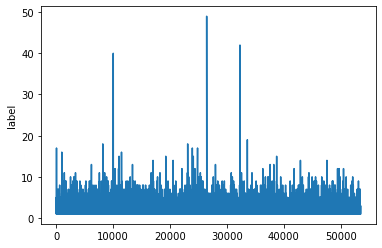

In [136]:
sns.lineplot(x = range(1,len(y_pred)+1), y = y_test)

<AxesSubplot:>

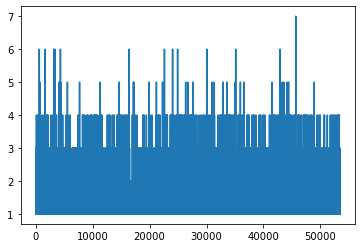

In [137]:
sns.lineplot(x = range(1,len(y_pred)+1), y = y_pred)

In [3]:
loan = pd.read_csv('loan_final.csv')

In [9]:
loan = loan.groupby(['code','isbn']).size().reset_index()

In [10]:
loan

code           isbn  0
0        50001   701197350108  1
1        50001  1828218012402  1
2        50001  2007048001073  2
3        50001  2016101312346  9
4        50001  2016101420454  6
...        ...            ... ..
352075  149023  9791197397110  1
352076  149023  9791197400209  5
352077  149023  9791197410307  1
352078  149023  9791197453601  1
352079  149023  9791197455407  1

[352080 rows x 3 columns]

In [39]:
perc_1 = []
for c in loan.code.value_counts().index:
    f1 = loan.code.value_counts()[c]
    f2 = len(loan.loc[(loan.code == c)&(loan[0] == 1),:])
    perc_1.append(f2/f1)

In [40]:
perc_1 = list(map(lambda x: x * 100, perc_1))
perc_1

In [32]:
import json
scaler = joblib.load('scaler_gt10.gz')

with open('dt_gt10.json') as json_file:
    dt_gt = json.load(json_file)
    
data_gt = pd.read_csv('data_gt10.csv', dtype=dt_gt)
data_gt.label = np.log10(data_gt.label)

data_X, data_y = data_gt.loc[:,[x for x in data_gt.columns if x != 'label']], data_gt.label
data_X = scaler.transform(data_X)

X_train, X_test, y_train, y_test  = train_test_split(data_X, data_y, test_size = 0.2, random_state = 42)

y_test = 10 ** y_test

xgb_model = joblib.load('xgb_gt10.dat')
mlp = keras.models.load_model('mlp_gt10.h5')

y_xgb_pred =np.round(10 ** xgb_model.predict(X_test))
y_mlp_pred = np.round(10 ** mlp.predict(X_test))

In [209]:
mean_squared_error(y_xgb_pred, y_test, squared=False)

1.098165807155043

In [37]:
mean_squared_error(y_mlp_pred, y_test, squared=False)

1.2148967540915714

In [38]:
y_test

253568    2.0
217703    1.0
182321    1.0
84627     1.0
188263    1.0
         ... 
94823     3.0
236709    1.0
102429    1.0
219191    2.0
144794    1.0
Name: label, Length: 53484, dtype: float64

In [40]:
pd.Series(y_xgb_pred)

0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
53479    2.0
53480    2.0
53481    1.0
53482    2.0
53483    1.0
Length: 53484, dtype: float32

In [41]:
pred_df = pd.DataFrame({'y' : y_test, 'y_hat' : y_xgb_pred})

In [43]:
pred_df = pred_df.loc[pred_df.y != 1, :]

In [48]:
pred_df

y  y_hat    idx
253568  2.0    1.0      1
122966  2.0    3.0      2
12768   2.0    2.0      3
35947   2.0    1.0      4
169355  2.0    1.0      5
...     ...    ...    ...
217225  2.0    2.0  23732
30577   3.0    2.0  23733
259643  2.0    2.0  23734
94823   3.0    2.0  23735
219191  2.0    2.0  23736

[23736 rows x 3 columns]

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

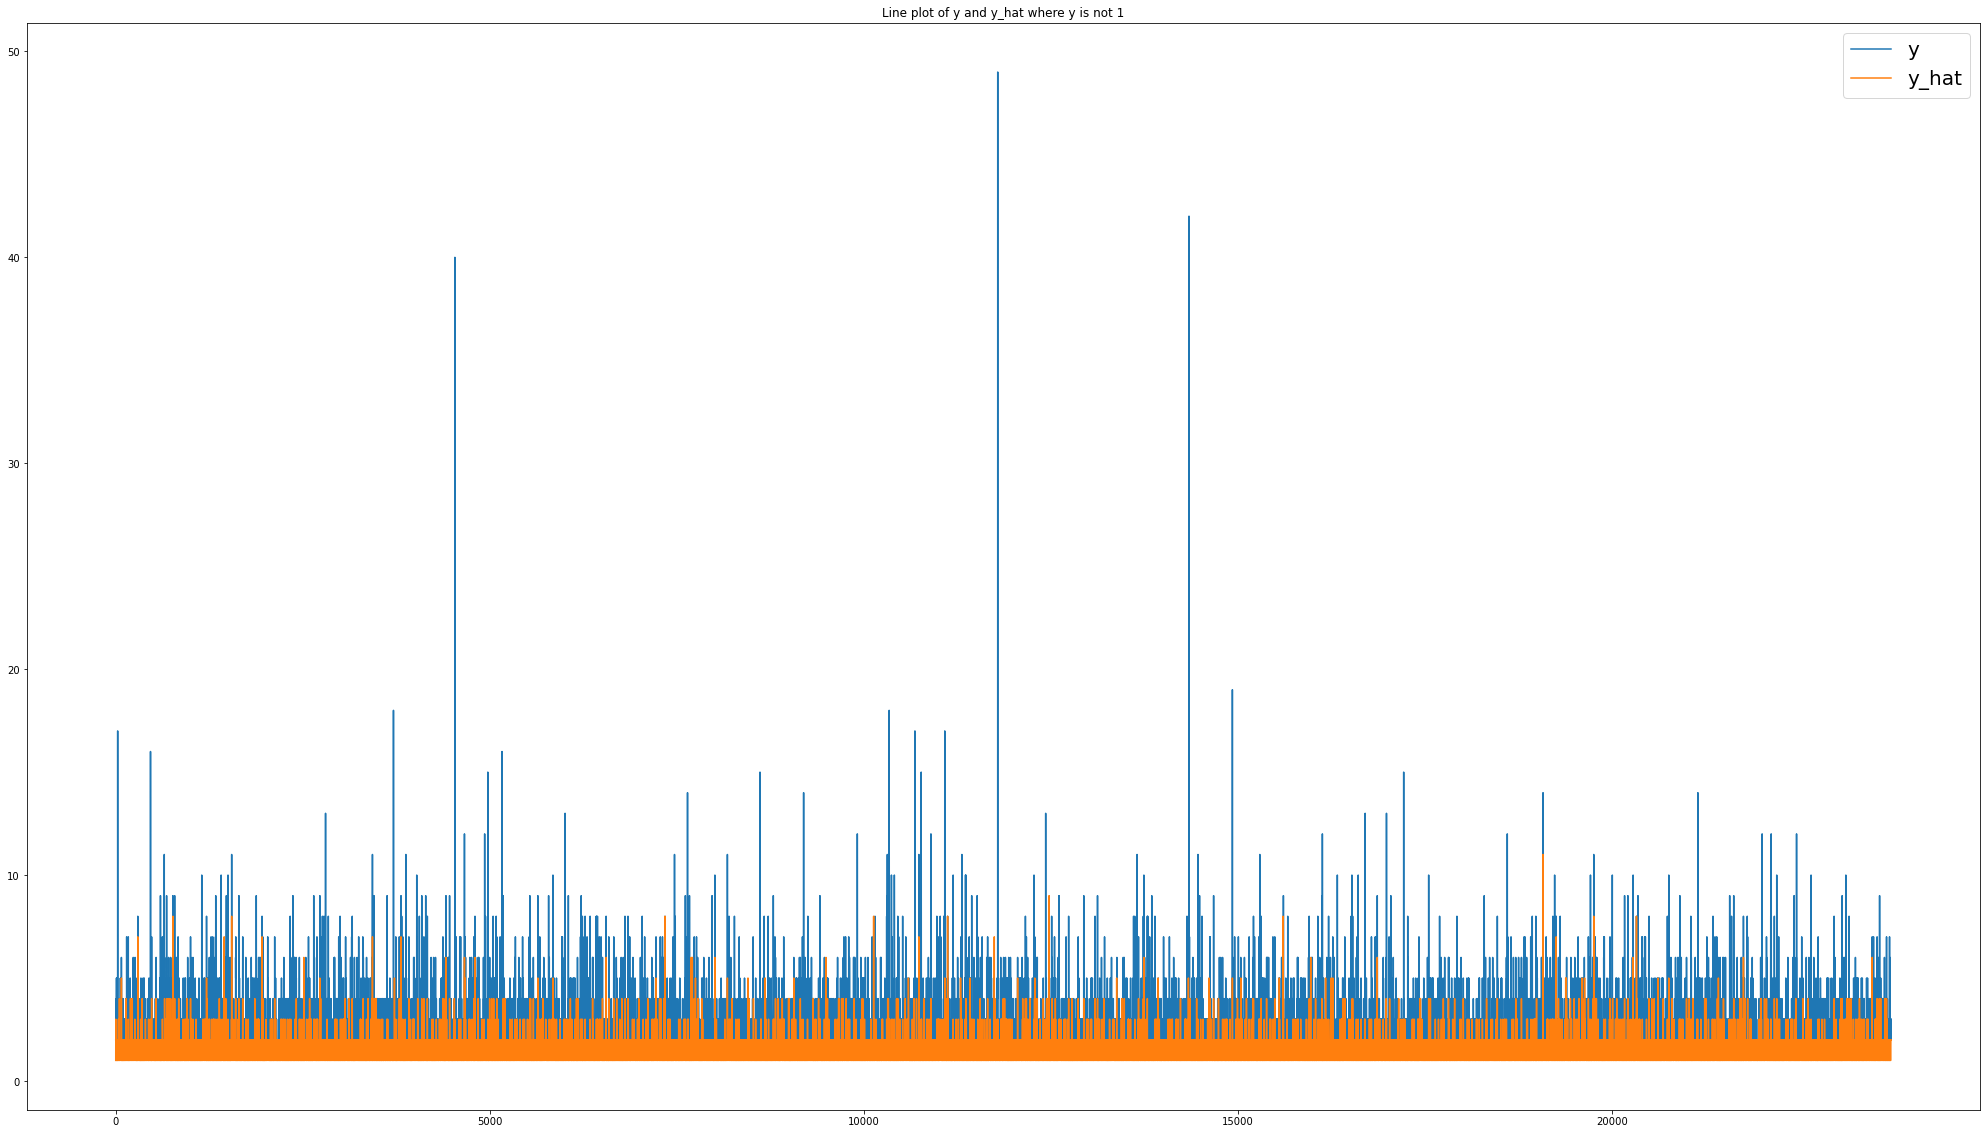

In [61]:
fix, ax = plt.subplots(figsize = [35, 20])

plt.plot(pred_df.idx, pred_df.y, label = 'y')
plt.plot(pred_df.idx, pred_df.y_hat, label = 'y_hat')
plt.legend(prop={'size': 20})
plt.title('Barplot of y and y_hat where y is not 1')
plt.show()

In [147]:
import umap
reducer = umap.UMAP(n_neighbors=50)

In [65]:
book_i = pd.read_csv('book_info_ed.csv')

In [89]:
word_e = book_i.loc[:,[str(x) for x in range(0,300)]]

In [93]:
word_e = word_e.loc[word_e.sum(axis = 1) != 0,:]

In [92]:
sub_color = book_i.loc[word_e.sum(axis = 1) != 0,'subject_1']

In [94]:
word_e

0         1         2         3         4         5         6  \
0      0.083064  0.008336  0.002925  0.064175  0.019098  0.009725  0.036200   
1     -0.073918 -0.046977 -0.210346  0.050686  0.039354  0.017076 -0.154253   
2      0.000631 -0.009112 -0.166864  0.076875 -0.083095 -0.006436 -0.006620   
3     -0.170865  0.307301 -0.106894  0.169494  0.145673  0.000571 -0.031104   
4      0.000296  0.043311 -0.291191 -0.065490 -0.095632  0.093042  0.204700   
...         ...       ...       ...       ...       ...       ...       ...   
70463 -0.037777 -0.062850 -0.177599 -0.116893 -0.047831  0.058530  0.061437   
70464  0.021332 -0.105642 -0.071344 -0.024360  0.036099  0.002363  0.052705   
70465  0.064369 -0.039647 -0.286619 -0.068289 -0.139695 -0.000851  0.103998   
70466 -0.021974  0.029874 -0.143847 -0.047435 -0.075169  0.011601 -0.041482   
70467  0.025134  0.100397  0.005631  0.015471 -0.145836  0.018346  0.109977   

              7         8         9  ...       290       291       292  \
0      0.022701 -0.073607 -0.036713  ... -0.005644 -0.017909  0.172912   
1      0.028066  0.013083 -0.050751  ... -0.045262 -0.033958  0.016278   
2     -0.014905 -0.031347  0.021390  ...  0.076707 -0.030324  0.019404   
3     -0.100594 -0.062659 -0.144749  ...  0.098116 -0.222399 -0.170482   
4      0.014111 -0.090413 -0.019479  ...  0.054912 -0.077730  0.073448   
...         ...       ...       ...  ...       ...       ...       ...   
70463 -0.073615 -0.146969 -0.023265  ... -0.048160  0.080148  0.029377   
70464 -0.009158 -0.097728  0.053852  ... -0.013649 -0.096079  0.012867   
70465  0.051841 -0.030569  0.045278  ... -0.009137  0.032485  0.220457   
70466 -0.042435  0.026571  0.004568  ...  0.082524 -0.004862  0.083314   
70467  0.003735 -0.034781 -0.023919  ... -0.024888  0.053663  0.030006   

            293       294       295       296       297       298       299  
0     -0.108245  0.025776  0.031675 -0.020742 -0.046615 -0.050493  0.015559  
1      0.058748  0.059430  0.098846 -0.108471  0.105447 -0.015427  0.035924  
2      0.134331 -0.049716  0.061135 -0.145448  0.041747 -0.017358 -0.073311  
3      0.178094  0.097422 -0.019631 -0.072726 -0.019588 -0.102614  0.096325  
4      0.205820 -0.055464  0.213521 -0.040159 -0.008648  0.077384 -0.128911  
...         ...       ...       ...       ...       ...       ...       ...  
70463 -0.154160  0.020786  0.066037 -0.052799  0.075120  0.119971  0.008912  
70464 -0.025119 -0.064181  0.008629  0.032396  0.057736  0.081597  0.064217  
70465 -0.033335  0.061880 -0.050845 -0.096808  0.053060  0.028749  0.075122  
70466 -0.095572  0.038995 -0.101403  0.025700 -0.058458 -0.049406  0.008968  
70467  0.018262 -0.008754 -0.022972 -0.053017 -0.028270  0.036841 -0.110514  

[69053 rows x 300 columns]

In [148]:
umap_e = reducer.fit_transform(word_e)

In [149]:
umap_e.shape

(69053, 2)

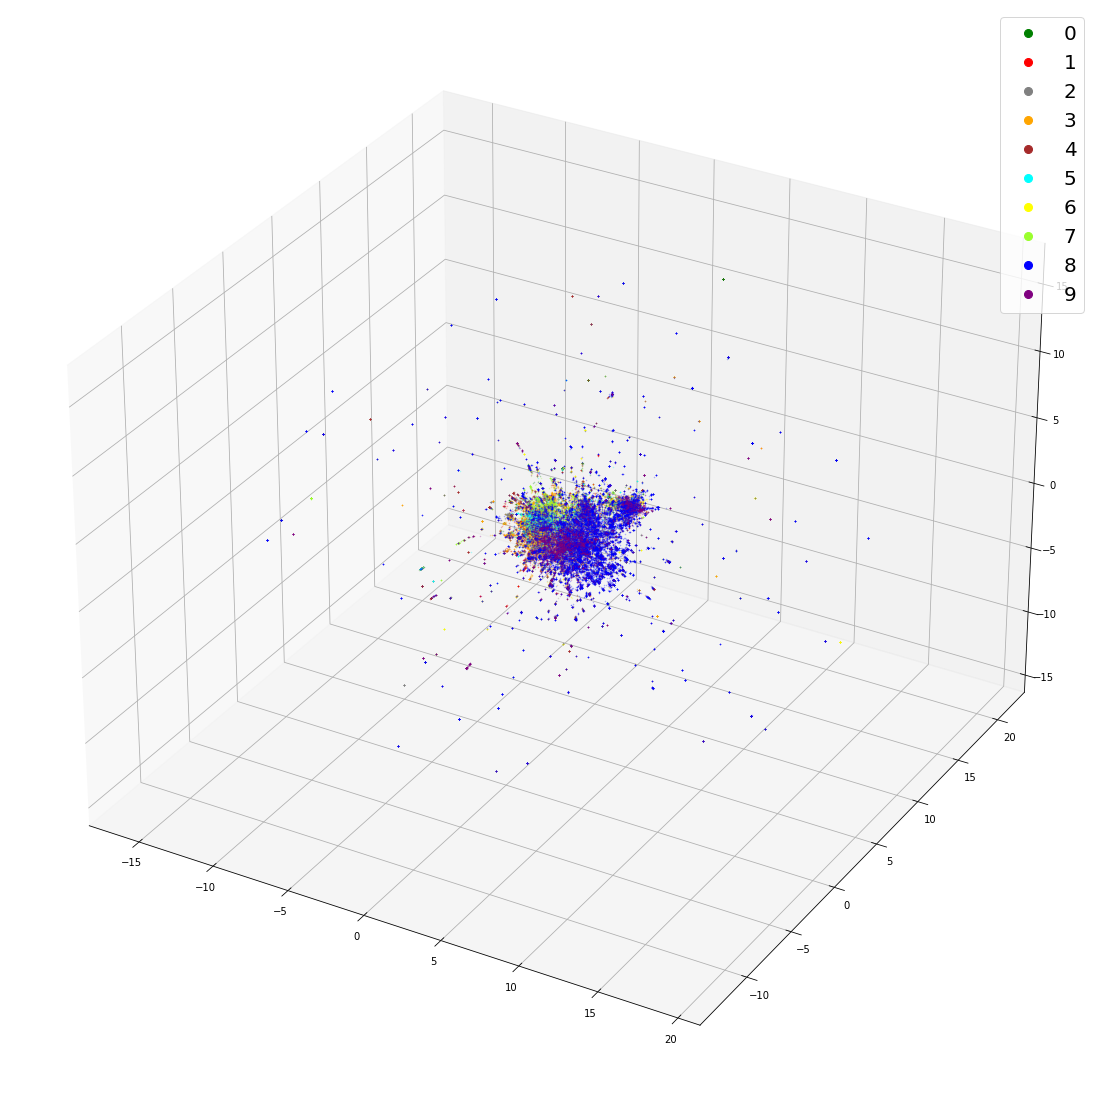

In [211]:
fig1=plt.figure(figsize=(40,20))
axes = fig1.add_subplot(111, projection='3d')

axes.plot(umap_e_3d[sub_color==0,0],umap_e_3d[sub_color==0,1],umap_e_3d[sub_color==0,2],"o",label="0", color='green', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==1,0],umap_e_3d[sub_color==1,1],umap_e_3d[sub_color==1,2],"o",label="1", color='red', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==2,0],umap_e_3d[sub_color==2,1],umap_e_3d[sub_color==2,2],"o",label="2", color='grey', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==3,0],umap_e_3d[sub_color==3,1],umap_e_3d[sub_color==3,2],"o",label="3", color='orange', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==4,0],umap_e_3d[sub_color==4,1],umap_e_3d[sub_color==4,2],"o",label="4", color='brown', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==5,0],umap_e_3d[sub_color==5,1],umap_e_3d[sub_color==5,2],"o",label="5", color='cyan', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==6,0],umap_e_3d[sub_color==6,1],umap_e_3d[sub_color==6,2],"o",label="6", color='yellow', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==7,0],umap_e_3d[sub_color==7,1],umap_e_3d[sub_color==7,2],"o",label="7", color='#9AFE2E', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==8,0],umap_e_3d[sub_color==8,1],umap_e_3d[sub_color==8,2],"o",label="8", color='blue', markersize = .5, alpha = .3)
axes.plot(umap_e_3d[sub_color==9,0],umap_e_3d[sub_color==9,1],umap_e_3d[sub_color==9,2],"o",label="9", color='purple', markersize = .5, alpha = .3)

lgnd = plt.legend(fontsize=20)
for i in range(0,10):
    lgnd.legendHandles[i]._legmarker.set_markersize(8)
    lgnd.legendHandles[i]._legmarker.set_alpha(1)

In [173]:
umap_e_3d[sub_color==0,0]

array([-1.1065131 ,  0.42180684,  2.3764195 , ...,  1.288307  ,
        4.47263   ,  0.27116266], dtype=float32)

In [162]:
len(umap_e_3d[:,2])

69053

In [212]:
umap.__version__

'0.5.1'

In [213]:
loan = pd.read_csv('loan_final.csv')

In [218]:
l_s = loan.groupby(['code','isbn']).size()

In [221]:
l_s.values

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Histogram of the number of loans by library')

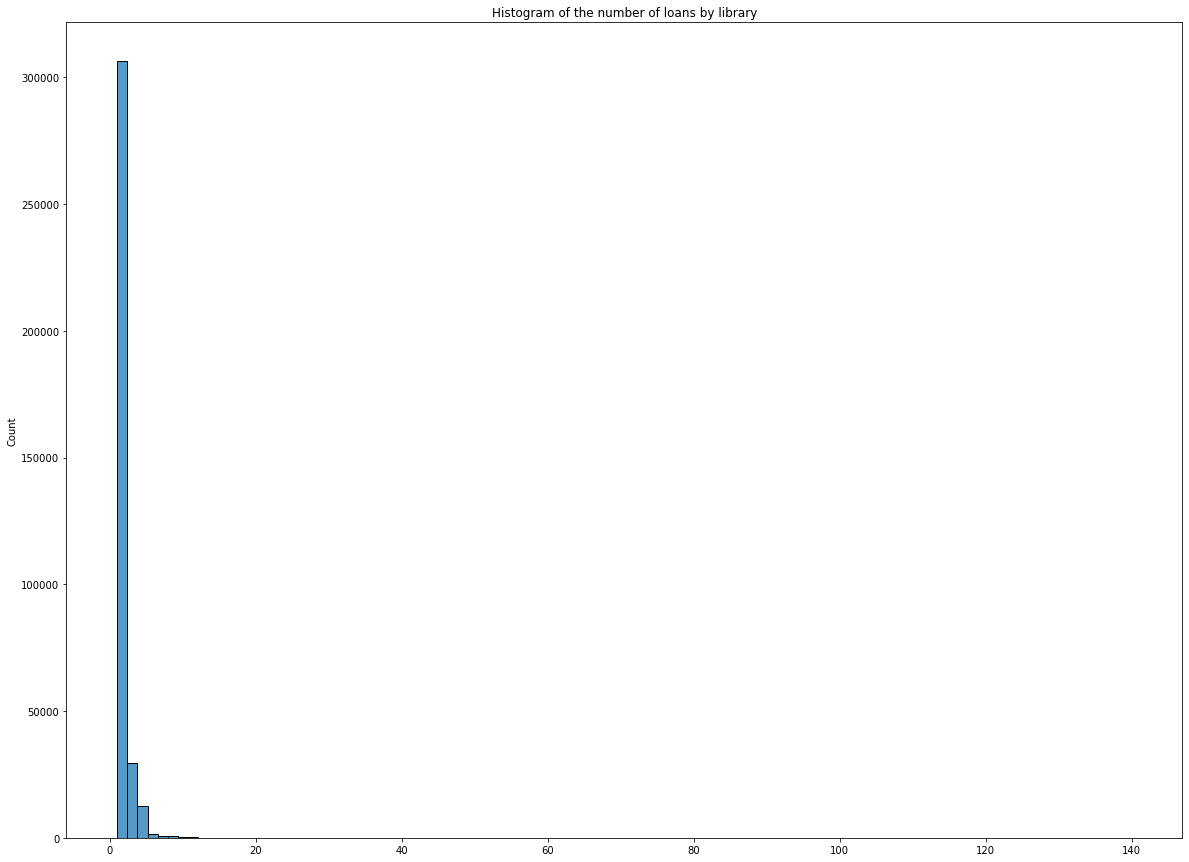

In [235]:
fig, ax = plt.subplots(figsize = [20,15])
g = sns.histplot(l_s.values, bins=100)
g.set_title('Histogram of the number of loans by library')